# FLIGHT-FARE PREDICTION

For a traveller it is important to know the fare value of a trip, and as prices of flight ticket varies abruptly and it becomes hectic for a user to check different websites, use different deals. A flight fare prediction model will help inform the travellers with the optimal time to buy their flight tickets and understand trends in the airline industry.

## STEPS
1.We will be using train and test data. Test data is similar to train data minus the ‘price’ column. 2.We can do some data pre-processing and remove variables which are not needed and add some new features like ‘Booking_class’ and ‘market_share’ which will indicate the market share of each airline.

2.Next step is Feature generation, here we mainly work on the data and do some transformations to extract unknown variables or create different bons of particular columns and clean the messy data.

3.Do some EDA, data visualisation to understand the relationship between different independent variables and the relationship between the independent variables and the dependent variables.
## BUILDING OUR MODEL
Finally after the above steps, we can deploy the model and evaluate the efficiency of the predictions.

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_excel('Data_Train.xlsx')
test_data= pd.read_excel('Test_set.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.shape

(10683, 11)

In [5]:
test_data.shape

(2671, 10)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dropna(inplace=True)

In [10]:
# Checking if there are any Duplicate values
train_data[train_data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [11]:
# Drop duplicates value
train_data.drop_duplicates(keep='first',inplace=True)

In [12]:
train_data.shape

(10462, 11)

## FEATURE EXTRACTION

In [13]:
# Extracting day,month,weekday from Date of Journey
train_data['Journey_Day'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.day
train_data['Journey_Month'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.month
train_data['weekday']= pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.weekday

test_data['Journey_Day'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.day
test_data['Journey_Month'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.month
test_data['weekday']= pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [14]:
train_data.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
test_data.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [15]:
# Duration convert hours in min.
train_data['Duration']=  train_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_data['Duration']=  test_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [16]:
# converting total_stops to 0,1,2,3 and so-on
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
train_data['Total_Stops']=train_data['Total_Stops'].apply(stops)
test_data['Total_Stops']=test_data['Total_Stops'].apply(stops)

In [17]:
train_data=train_data.drop(['Route'], axis=1) #we don't need it as we already have total_stops
test_data=test_data.drop(['Route'], axis=1)

In [18]:
#Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
train_data['Dep_Time']=train_data['Dep_Time'].apply(deparrtime)
test_data['Dep_Time']=test_data['Dep_Time'].apply(deparrtime)
train_data['Arrival_Time']=train_data['Arrival_Time'].apply(deparrtime)
test_data['Arrival_Time']=test_data['Arrival_Time'].apply(deparrtime)

In [19]:
test_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,Jet Airways,Delhi,Cochin,Evening,Night,655,1,No info,6,6,3
1,IndiGo,Kolkata,Banglore,Morning,Morning,240,1,No info,12,5,6
2,Jet Airways,Delhi,Cochin,Evening,Evening,1425,1,In-flight meal not included,21,5,1
3,Multiple carriers,Delhi,Cochin,Morning,Night,780,1,No info,21,5,1
4,Air Asia,Banglore,Delhi,Night,Night,170,0,No info,24,6,0


In [20]:
# Additional_Info contains almost 80% no_info
train_data.drop(["Additional_Info"], axis = 1, inplace = True)
test_data.drop(["Additional_Info"], axis = 1, inplace = True)

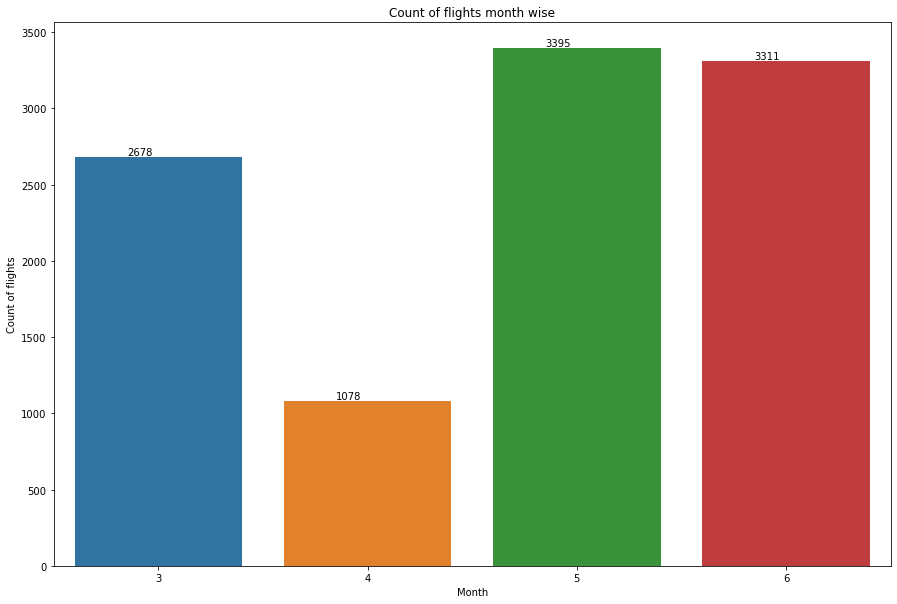

In [21]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_Month', data = train_data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [22]:
train_data["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

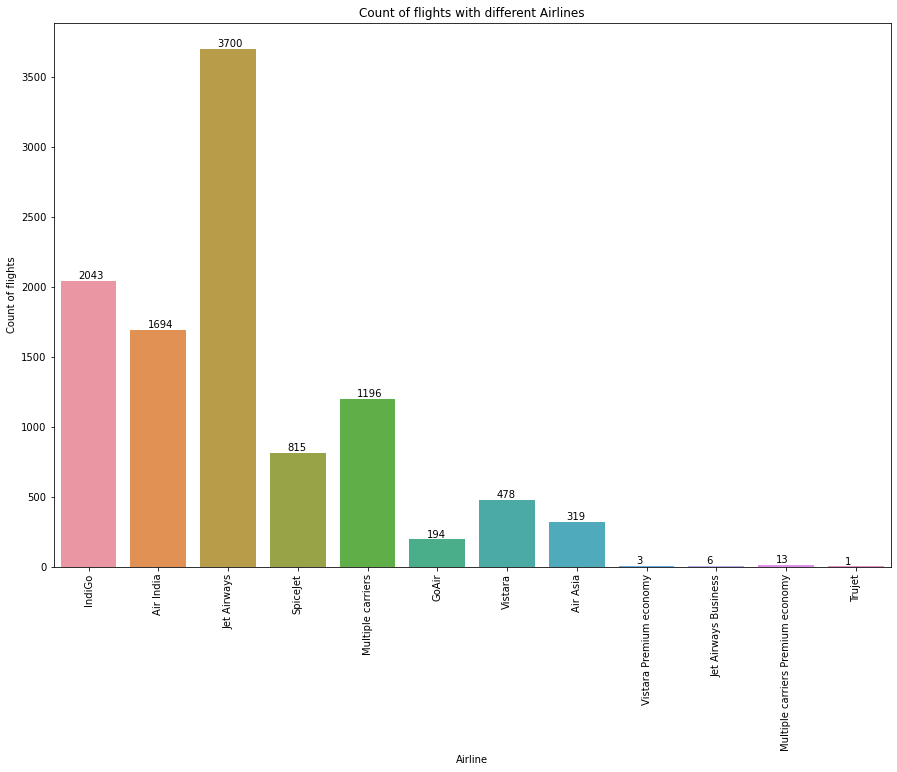

In [23]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

There are more number of flights of Jet Airways.

Jet Airways Business, Vistara Premium economy, Trujet have actually almost negligible flights.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

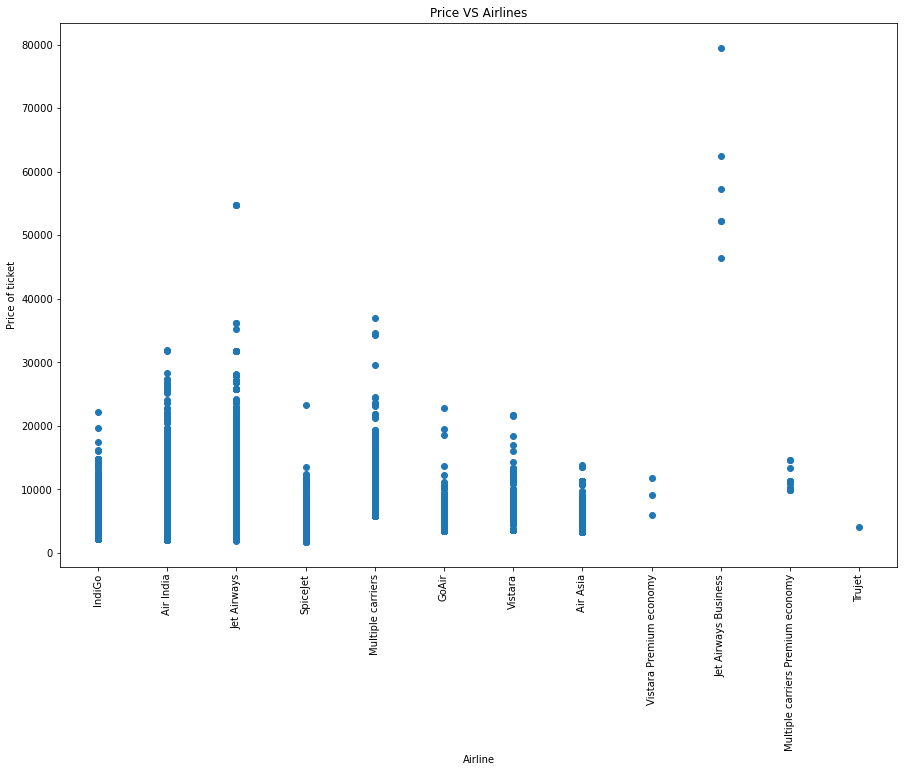

In [24]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(train_data['Airline'], train_data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

The ticket rate for Jet Airways Business airline is high.

In [25]:
# Airline
train_data["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

test_data["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

In [26]:
#price outlier check
Q1=train_data['Price'].quantile(0.25)
Q3=train_data['Price'].quantile(0.75)
IQR=Q3-Q1

print(Q1)
print(Q3)
print(IQR)

5224.0
12344.75
7120.75


In [27]:
#price outlier removed
train_data=train_data[~((train_data['Price']>Q3+1.5*IQR)|(train_data['Price']<Q1-1.5*IQR))]

In [28]:
train_data.shape

(10368, 11)

In [29]:
train_data["Duration"]= (train_data["Duration"] - train_data["Duration"].mean())/train_data["Duration"].std()   #standardizing
test_data["Duration"]= (test_data["Duration"] - test_data["Duration"].mean())/test_data["Duration"].std()

## Convert categorical data into numerical

In [30]:
data = train_data.drop(["Price"], axis=1)

In [31]:
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = test_data.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test_data.select_dtypes(include=['int64', 'float','int32'])

In [32]:
train_categorical_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops
0,IndiGo,Banglore,New Delhi,Night,Night,0
1,Air India,Kolkata,Banglore,Morning,Afternoon,2
2,Jet Airways,Delhi,Cochin,Morning,Night,2
3,IndiGo,Kolkata,Banglore,Evening,Night,1
4,IndiGo,Banglore,New Delhi,Evening,Night,1


In [33]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [34]:
train_categorical_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops
0,3,0,5,3,3,0
1,1,3,0,2,0,2
2,4,2,1,2,3,2
3,3,3,0,1,3,1
4,3,0,5,1,3,1


In [35]:
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y=train_data['Price']
test_set = pd.concat([test_categorical_data, test_numerical_data], axis=1)

In [36]:
X.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Duration,Journey_Day,Journey_Month,weekday
0,3,0,5,3,3,0,-0.914913,24,3,6
1,1,3,0,2,0,2,-0.366128,1,5,2
2,4,2,1,2,3,2,1.020804,9,6,6
3,3,3,0,1,3,1,-0.605598,12,5,6
4,3,0,5,1,3,1,-0.685421,1,3,4


In [37]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [39]:
# training testing and splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [40]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [41]:
y_train_pred =knn_regressor.predict(X_train) ##Predict train result
y_test_pred =knn_regressor.predict(X_test) ##Predict test result

In [42]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))


Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  1933.8275671861525
Mean absolute % error:  19.0
R-squared:  0.7743753813135745


In [43]:

print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  2381.6002667761522
Mean absolute % errorr:  23.0
R-squared:  0.6565614620852556


In [44]:
test_data

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Journey_Day,Journey_Month,weekday
0,Jet Airways,Delhi,Cochin,Evening,Night,0.030384,1,6,6,3
1,IndiGo,Kolkata,Banglore,Morning,Morning,-0.796002,1,12,5,6
2,Jet Airways,Delhi,Cochin,Evening,Evening,1.563677,1,21,5,1
3,Multiple carriers,Delhi,Cochin,Morning,Night,0.279295,1,21,5,1
4,Air Asia,Banglore,Delhi,Night,Night,-0.935392,0,24,6,0
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,Evening,Evening,1.583590,1,6,6,3
2667,IndiGo,Kolkata,Banglore,Afternoon,Evening,-0.965261,0,27,3,2
2668,Jet Airways,Delhi,Cochin,Night,Night,-0.487352,1,6,3,2
2669,Air India,Delhi,Cochin,Night,Evening,0.548119,1,6,3,2


In [45]:
train_data

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,-0.914913,0,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,-0.366128,2,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1.020804,2,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,-0.605598,1,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,-0.685421,1,13302,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,Evening,Night,-0.954825,0,4107,9,4,1
10679,Air India,Kolkata,Banglore,Evening,Night,-0.944847,0,4145,27,4,5
10680,Jet Airways,Banglore,Delhi,Morning,Afternoon,-0.894958,0,7229,27,4,5
10681,Vistara,Banglore,New Delhi,Afternoon,Afternoon,-0.934869,0,12648,1,3,4


In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [55]:
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [49]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [56]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [57]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [58]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [59]:
prediction = rf_random.predict(X_test)

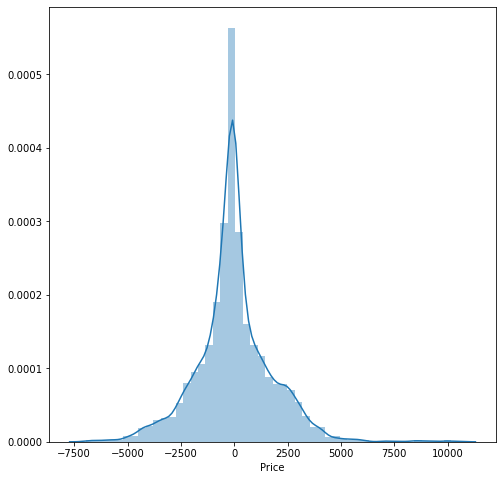

In [60]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

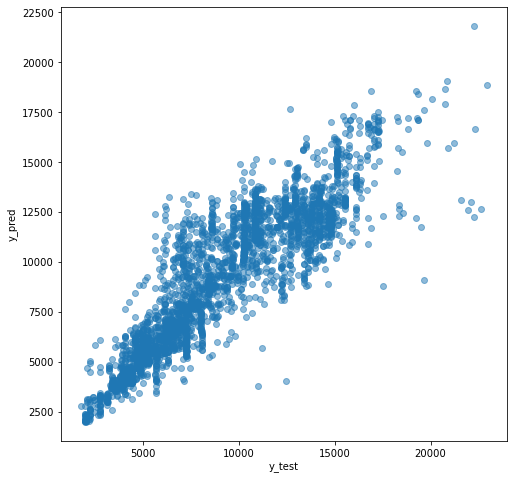

In [61]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [63]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1233.532637913811
MSE: 3147596.852741319
RMSE: 1774.1467957137368


In [64]:
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, prediction)))
print("R-squared: ", r2_score(y_test, prediction))

Mean absolute % errorr:  14.0
R-squared:  0.8094142662904708


#### Random Forest Performed Better than KNN Regressor.